In [8]:
import pandas as pd
data = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/Startups_Invest.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['State'] = le.fit_transform(data['State'])

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['Profit'], axis=1)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [12]:
print (X_train.shape)
print (X_test.shape)

(40, 4)
(10, 4)


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score

regr_1 = DecisionTreeRegressor()

X_train_new = X_train.drop(['State'], axis=1)
X_test_new = X_test.drop(['State'], axis=1)

regr_1.fit(X_train_new, y_train)

y_1 = regr_1.predict(X_test_new)

print ('R2_score DecisionTree = ', r2_score(y_test, y_1))

R2_score DecisionTree =  0.8802972417264724


In [14]:
X_test_new

,R&D Spend,Administration,Marketing Spend
37,44069.95,51283.14,197029.42
6,134615.46,147198.87,127716.82
47,0.00,135426.92,0.00
36,28663.76,127056.21,201126.82
5,131876.90,99814.71,362861.36
44,22177.74,154806.14,28334.72
27,72107.60,127864.55,353183.81
33,55493.95,103057.49,214634.81
40,28754.33,118546.05,172795.67
17,94657.16,145077.58,282574.31


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

LR = LinearRegression()
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)

print ('MSE of LinearRegression= ', mean_squared_error(y_test, predictions_LR))
print ('R2_score of Linear Regression= ', r2_score(y_test, predictions_LR))

MSE of LinearRegression=  50354791.17254009
R2_score of Linear Regression=  0.9588715476383267


In [16]:
from sklearn.svm import SVR 


svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
predictions_svr = svr.predict(X_test)

print ('MSE of LinearRegression= ', mean_squared_error(y_test, predictions_svr))
print ('R2_score of Linear Regression= ', r2_score(y_test, predictions_svr))

MSE of LinearRegression=  97663266.17510514
R2_score of Linear Regression=  0.9202312451936318


In [17]:
from sklearn.svm import SVR 


svr = SVR(kernel = 'linear')
svr.fit(X_train_new, y_train)
predictions_svr = svr.predict(X_test_new)

print ('MSE of LinearRegression= ', mean_squared_error(y_test, predictions_svr))
print ('R2_score of Linear Regression= ', r2_score(y_test, predictions_svr))

MSE of LinearRegression=  55670204.7526585
R2_score of Linear Regression=  0.9545300593882134


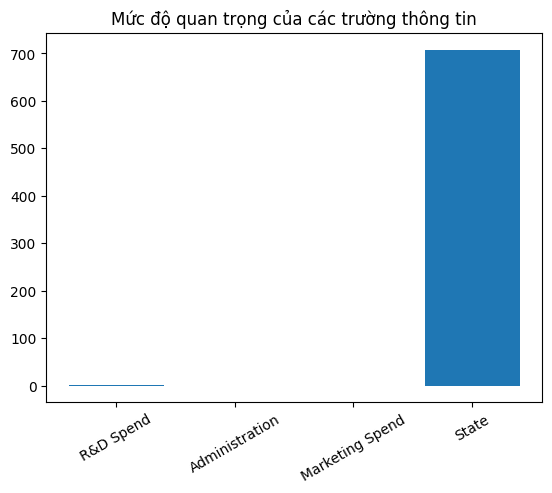

In [18]:
import matplotlib.pyplot as plt
A = list(X.columns)
importance = LR.coef_

# plot feature importance
feature = data.columns
plt.bar(A, importance)
plt.title ('Mức độ quan trọng của các trường thông tin')
plt.xticks(rotation = 30)
plt.show()

In [19]:
X_RandD_test = X_test['R&D Spend']

X_Admin = X_test['Administration']

X_Marketing = X_test ['Marketing Spend']



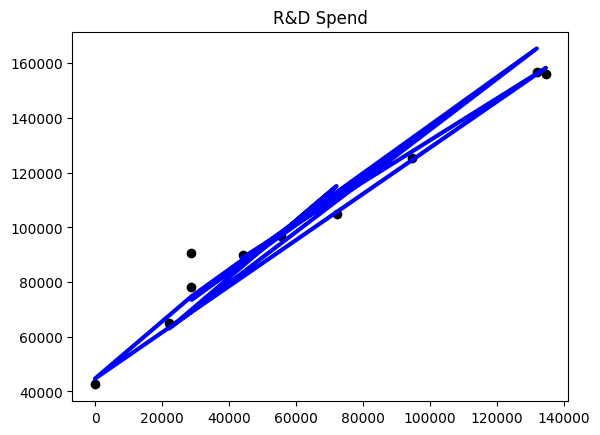

In [20]:
plt.scatter(X_RandD_test, y_test, color="black")
plt.plot(X_RandD_test, predictions_LR, color="blue", linewidth=3)

plt.title ('R&D Spend')
plt.show()

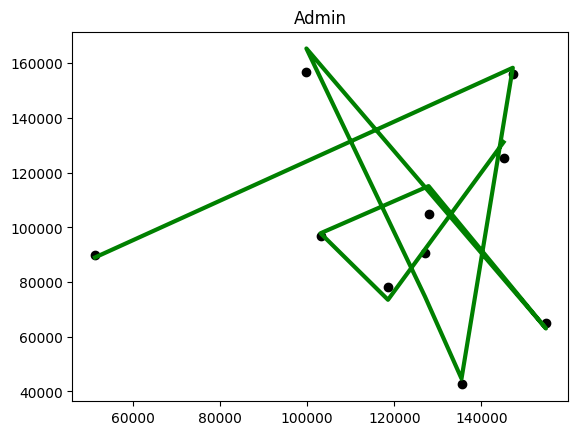

In [21]:
plt.scatter(X_Admin, y_test, color="black")
plt.plot(X_Admin, predictions_LR, color="green", linewidth=3)

plt.title ('Admin')
plt.show()

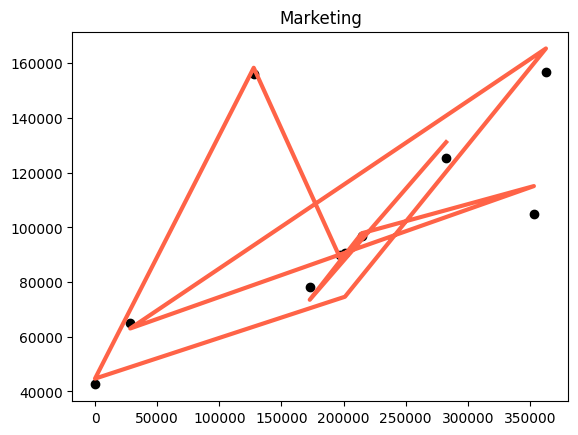

In [22]:
plt.scatter(X_Marketing, y_test, color="black")
plt.plot(X_Marketing, predictions_LR, color="tomato", linewidth=3)

plt.title ('Marketing')
plt.show()